In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

https://github.com/yash331/ds203_project.git

In [ ]:
!git clone https://github.com/yash331/ds203_project.git

fatal: destination path 'ds203_project' already exists and is not an empty directory.


In [ ]:
url_lifeexp='https://raw.githubusercontent.com/yash331/ds203_project/main/LifeExpectancyData.csv'
main_data = pd.read_csv(url_lifeexp, encoding='unicode_escape')
main_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
np.unique(main_data.Year)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

In [ ]:
main_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
index_Sudan = main_data[(main_data['Country'] == 'Sudan') | (main_data['Country'] == 'South Sudan')].index
main_data.drop(index_Sudan, inplace = True)
main_data = main_data.reset_index(drop =True)

In [ ]:
pd.options.display.max_rows = 700
np.unique(pd.DataFrame(main_data[main_data['GDP'].isnull()])['Country'])

array(['Bahamas', 'Bolivia (Plurinational State of)', 'Congo',
       'Cook Islands', 'Czechia', "CÃ´te d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Iran (Islamic Republic of)', 'Iraq', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'Monaco', 'Niue',
       'Papua New Guinea', 'Republic of Korea', 'Republic of Moldova',
       'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino',
       'Sao Tome and Principe', 'Slovakia', 'Somalia',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

In [ ]:
from pickleshare import main

columns_extrapolate = main_data.columns
main_data_copy = main_data

for column in columns_extrapolate:
    countries_missing = np.unique(main_data[main_data[column].isnull()]['Country'])
    for country in countries_missing:
        data_temp = main_data[main_data['Country'] == country]
        main_data = main_data[main_data['Country'] != country]

        data_temp[column] = data_temp[column].interpolate(method ='linear', limit_direction ='both')
        main_data = pd.concat([main_data, data_temp])
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
main_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                              1
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                 2
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years                2
 thinness 5-9 years                  2
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
url_gdpdata='https://raw.githubusercontent.com/yash331/ds203_project/main/GDP_dataset.csv'
GDP_data = pd.read_csv(url_gdpdata)
GDP_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25496.843940,26442.426800,26895.057170,28399.050130,28453.715560,29348.418970,30253.714230,31135.884360,23384.298790,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726326,162.555968,172.271022,199.784916,180.228774,199.517227,...,1777.303950,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,638.845852,624.315454,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.930722,113.080062,118.829461,123.441090,131.852423,138.524029,...,1965.115750,2157.494584,2212.914095,1894.322115,1673.843681,1613.490478,1704.135698,1777.852822,1709.764129,1774.921218
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4978.434435,5127.717243,5094.112329,3127.890598,1728.023754,2313.220584,2524.942483,2177.799015,1631.431691,2137.909393


In [ ]:
missing_GDP_df = main_data[main_data['GDP'].isna()]

for i in missing_GDP_df.index:
    country =str(missing_GDP_df.loc[i]['Country'])
    year = str(int(missing_GDP_df.loc[i]['Year']))
    
    if not(year in GDP_data.columns):
        continue
    replacement = GDP_data[GDP_data['Country Name'] == country][year].values
    
    if len(replacement) == 0:
        continue
    
    if GDP_data[GDP_data['Country Name'] == country][year].isnull().sum() ==0:
        missing_GDP_df.loc[i,'GDP'] =  int(GDP_data[GDP_data['Country Name'] == country ][year].values)

main_data = main_data.dropna(subset=['GDP'])
main_data = pd.concat([main_data, missing_GDP_df])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
urlpop = 'https://github.com/yash331/ds203_project/blob/main/Population.csv'
population_data = pd.read_csv('/content/ds203_project/Population.csv')
population_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [ ]:
missing_population_df = main_data[main_data['Population'].isna()]

for i in missing_population_df.index:
    country =str(missing_population_df.loc[i]['Country'])
    year = str(int(missing_population_df.loc[i]['Year']))
    
    if not(year in population_data.columns):
        continue
    replacement = population_data[population_data['Country Name'] == country][year].values
    
    if len(replacement) == 0:
        continue
    
    if population_data[population_data['Country Name'] == country][year].isnull().sum() ==0:
        missing_population_df.loc[i,'Population'] =  int(population_data[population_data['Country Name'] == country ][year].values)

main_data = main_data.dropna(subset=['Population'])
main_data = pd.concat([main_data, missing_population_df])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
main_data = main_data[main_data['Life expectancy '].notna()]
main_data = main_data.reset_index(drop = True)
len(main_data.index)

2896

In [ ]:
main_data[main_data['Hepatitis B'].isna()]
#it seems few countries dont incude it in report so assuming they have min value
main_data['Hepatitis B']=main_data['Hepatitis B'].fillna(1.0)

In [ ]:
main_data[main_data['Total expenditure'].isna()] #missig data for korea and somalia and these countries contains other nan values so removing them from df
main_data.drop(main_data[main_data['Country']=='Somalia'].index, inplace=True)
main_data.drop(main_data[main_data['Country']=="Democratic People's Republic of Korea"].index, inplace=True)
main_data.drop(main_data[main_data['Country']=='The former Yugoslav republic of Macedonia'].index, inplace=True)
main_data.drop(main_data[main_data['Country']=="CÃ´te d'Ivoire"].index, inplace=True)

main_data[main_data['GDP'].isna()]#only 1 country with only 1 year missing data
main_data.at[2704, 'GDP']=main_data.at[2705, 'GDP']

In [ ]:
main_data[main_data['Income composition of resources'].isna()] #with 50%
main_data['Income composition of resources']=main_data['Income composition of resources'].fillna(0.679000)
main_data['Schooling']=main_data['Schooling'].fillna(12.400000)


In [ ]:
main_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
main_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2.832000e+03,2832.000000,2832.000000,2832.000000,2832.000000
mean,2007.500000,69.522316,161.669138,30.230932,4.607777,764.818290,72.655367,2448.442090,38.429732,41.800847,82.717161,5.942401,82.563559,1.752331,7758.704769,1.534016e+07,4.836653,4.869244,0.634282,12.104237
std,4.610586,9.398264,122.605623,120.008205,4.093352,2019.857061,32.209529,11662.970339,19.991176,163.242924,23.309131,2.509511,23.670741,5.157589,14200.312481,6.001049e+07,4.459975,4.550743,0.202202,3.179500
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.750000,63.700000,73.000000,0.000000,0.677500,7.203409,63.750000,0.000000,19.200000,0.000000,78.000000,4.260000,79.000000,0.100000,503.715825,2.759265e+05,1.600000,1.500000,0.507000,10.300000
50%,2007.500000,72.300000,142.000000,3.000000,3.820000,72.027525,88.000000,16.000000,43.850000,4.000000,93.000000,5.725000,93.000000,0.100000,1915.233097,1.886312e+06,3.300000,3.300000,0.679000,12.400000
75%,2011.250000,75.825000,224.000000,20.000000,7.812500,469.438412,96.000000,343.250000,56.200000,25.000000,97.000000,7.500000,97.000000,0.700000,6640.530605,8.992184e+06,7.200000,7.300000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


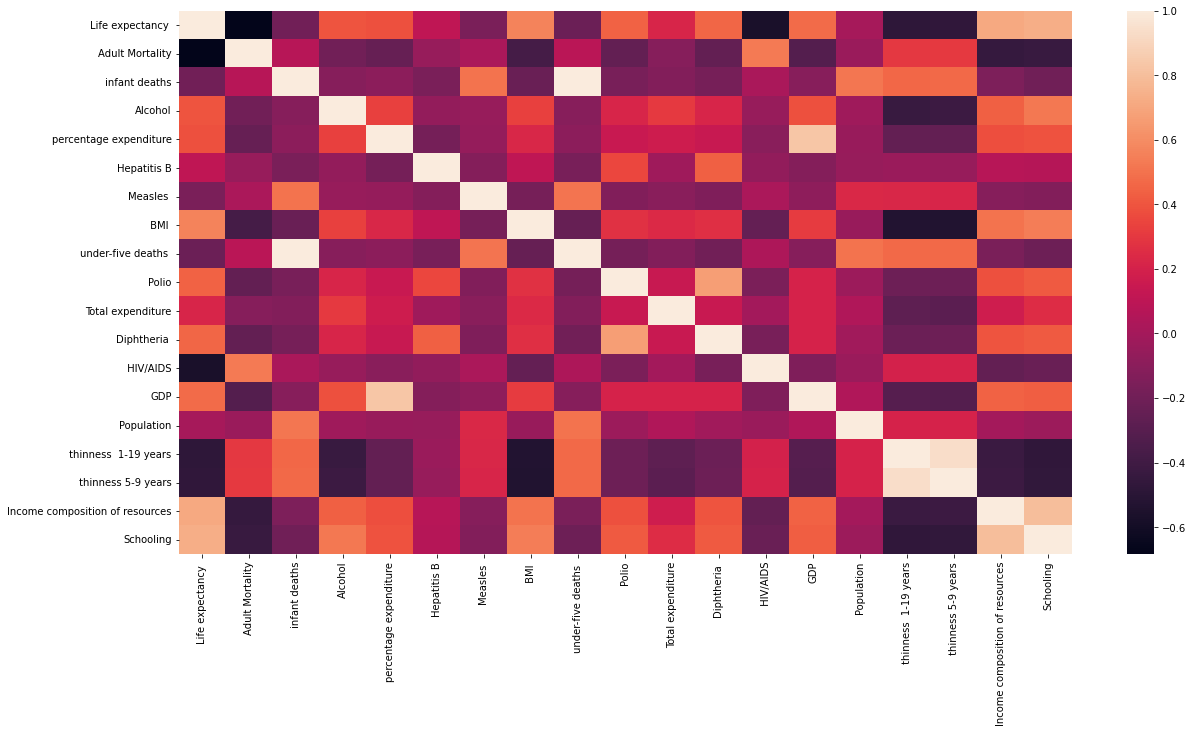

In [ ]:
numerical_columns = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 
                     'under-five deaths ', 'Polio','Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years','Income composition of resources','Schooling' ]
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(main_data[numerical_columns].corr())

Text(0.5, 0, 'Expenditure on health as a percentage of Gross Domestic Product per capita(%)')

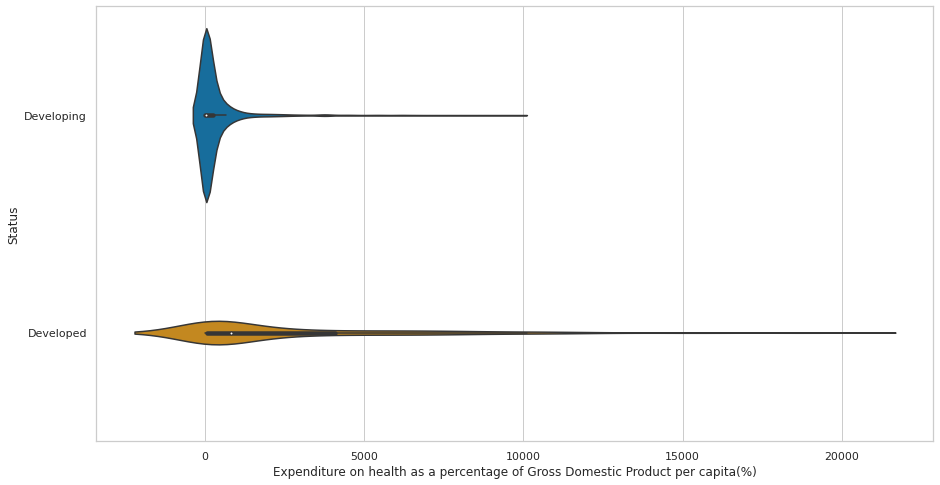

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(x="percentage expenditure", y="Status", data=main_data, palette = 'colorblind')
plt.xlabel('Expenditure on health as a percentage of Gross Domestic Product per capita(%)')

Text(0.5, 0, 'Gross Domestic Product per capita (in USD)')

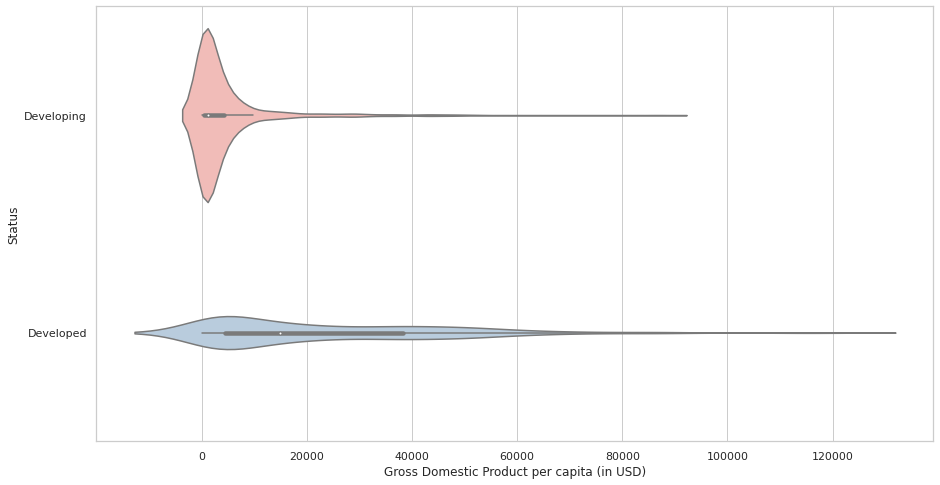

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(x="GDP", y="Status", data=main_data, palette = 'Pastel1')
plt.xlabel('Gross Domestic Product per capita (in USD)')

Text(0.5, 0, 'Hepatitis B immunization coverage among 1-year-olds (%)')

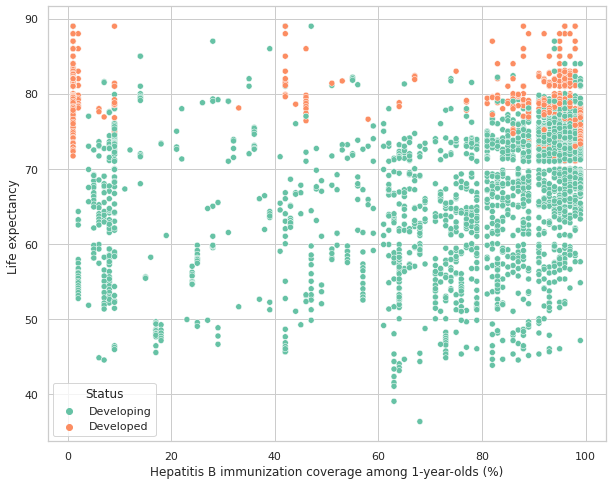

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Hepatitis B', y = 'Life expectancy ', data = main_data, color = 'violet', hue= 'Status',palette="Set2")
plt.xlabel('Hepatitis B immunization coverage among 1-year-olds (%)')

Text(0.5, 0, 'Measles - number of reported cases per 1000 population')

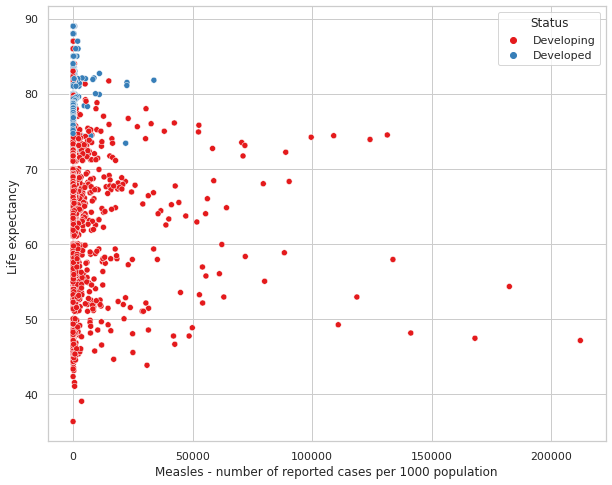

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Measles ', y = 'Life expectancy ', data = main_data, color = 'red', hue = 'Status',palette="Set1")
plt.xlabel('Measles - number of reported cases per 1000 population')

Text(0.5, 0, 'Polio immunization coverage among 1-year-olds (%)')

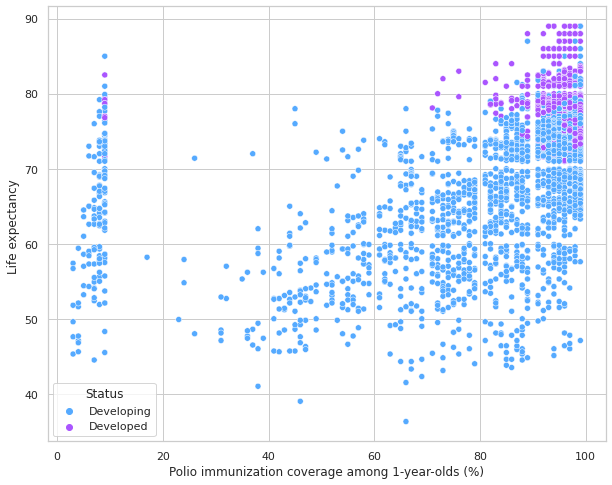

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Life expectancy ', x = 'Polio', data = main_data, palette='cool', hue = 'Status')
plt.xlabel('Polio immunization coverage among 1-year-olds (%)')

Text(0.5, 0, 'Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (%)')

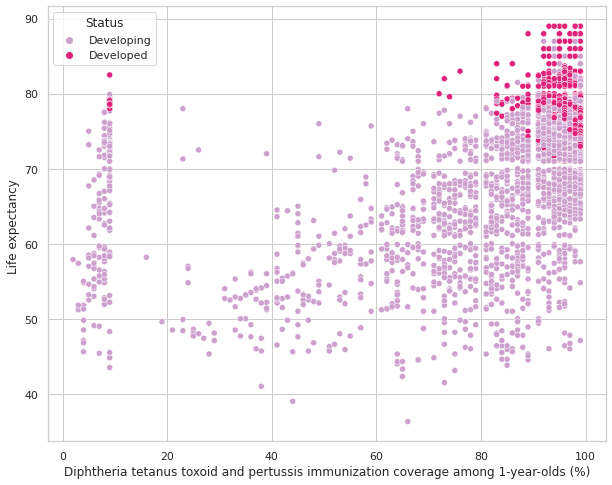

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Life expectancy ', x = 'Diphtheria ', data = main_data,  hue= 'Status', palette = 'PuRd')
plt.xlabel('Diphtheria tetanus toxoid and pertussis immunization coverage among 1-year-olds (%)')

Text(0.5, 0, 'Deaths per 1 000 live births HIV/AIDS (0-4 years)')

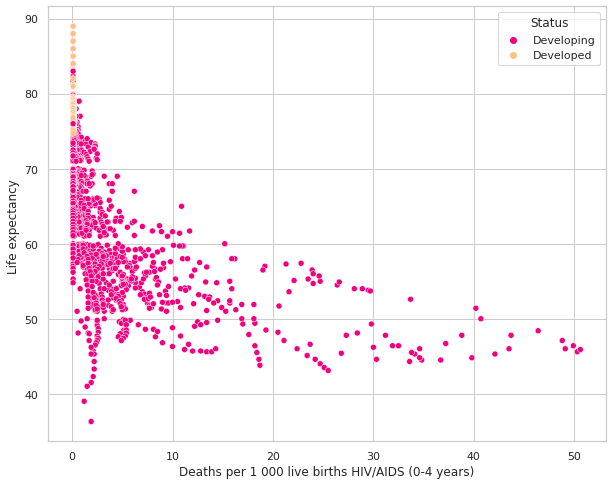

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Life expectancy ',x = ' HIV/AIDS', data = main_data, palette ='Accent_r',hue ='Status')
plt.xlabel('Deaths per 1 000 live births HIV/AIDS (0-4 years)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


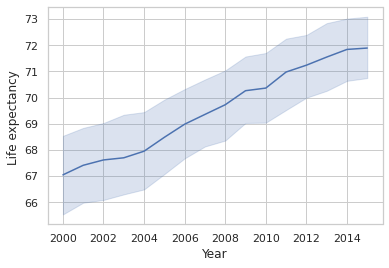

In [ ]:
sns.lineplot(main_data['Year'],main_data['Life expectancy '])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


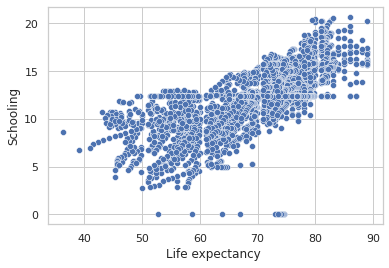

In [ ]:
sns.scatterplot(main_data['Life expectancy '],main_data['Schooling'])

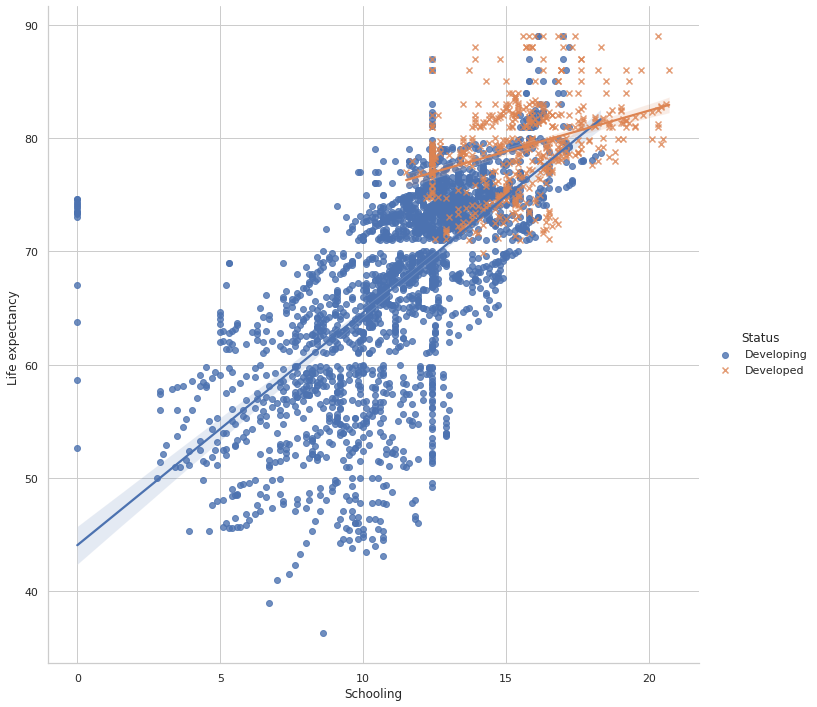

In [ ]:
sns.pairplot(main_data, x_vars=["Schooling"], y_vars=["Life expectancy "], hue="Status",markers=["o", "x"], height=10, kind="reg")

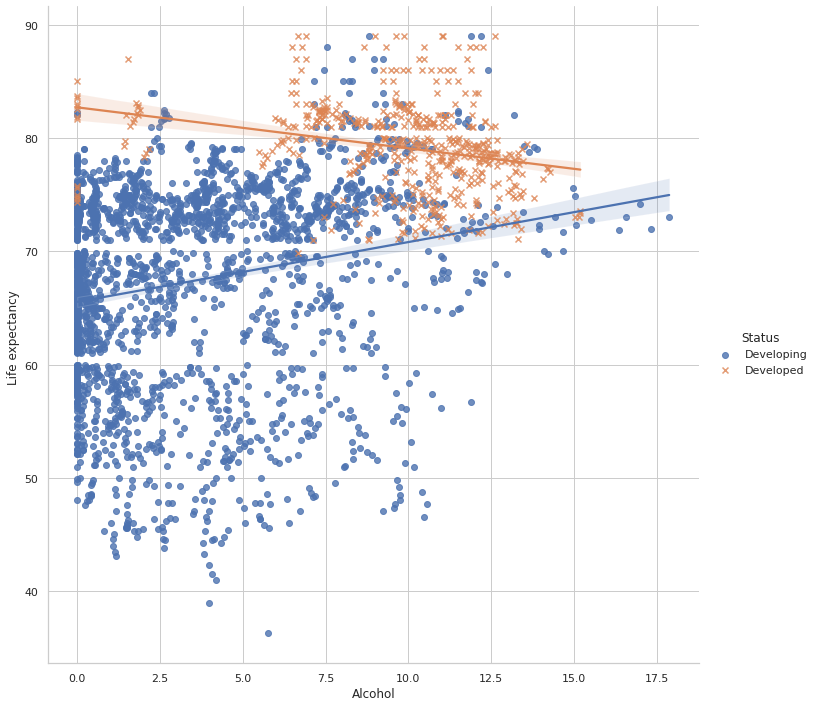

In [ ]:
sns.pairplot(main_data, x_vars=["Alcohol"], y_vars=["Life expectancy "], hue="Status",markers=["o", "x"], height=10, kind="reg")

Text(0.5, 0, 'Life expectancy vs BMI')

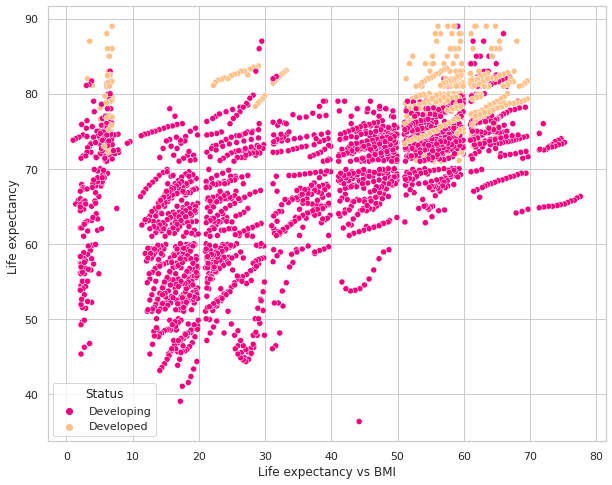

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Life expectancy ',x = ' BMI ', data = main_data, palette ='Accent_r',hue ='Status')
plt.xlabel('BMI')

Text(0.5, 0, 'BMI')

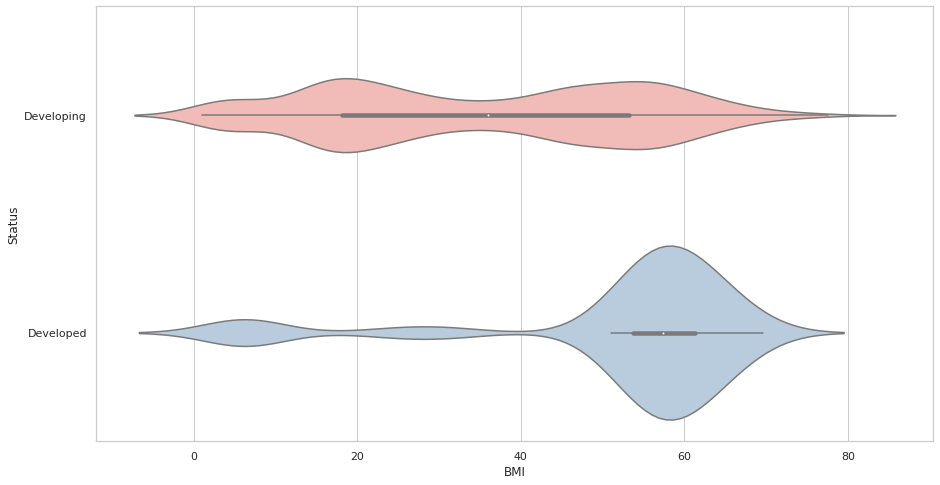

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(x=" BMI ", y="Status", data=main_data, palette = 'Pastel1')
plt.xlabel('BMI')

Text(0.5, 0, 'BMI')

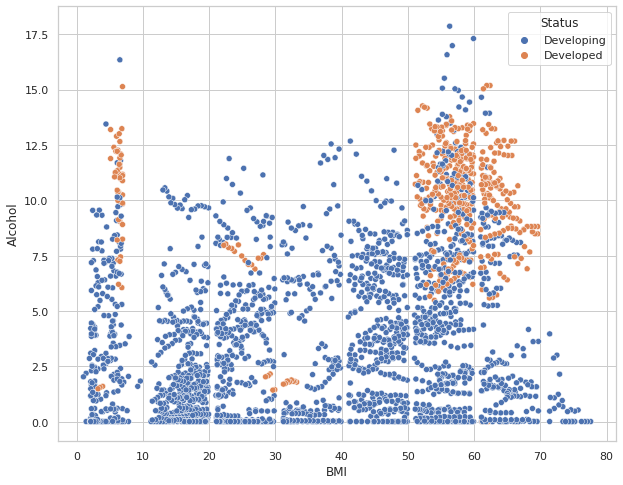

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Alcohol',x = ' BMI ', data = main_data, palette ='deep',hue ='Status')
plt.xlabel('BMI')

Text(0.5, 0, 'Alcohol')

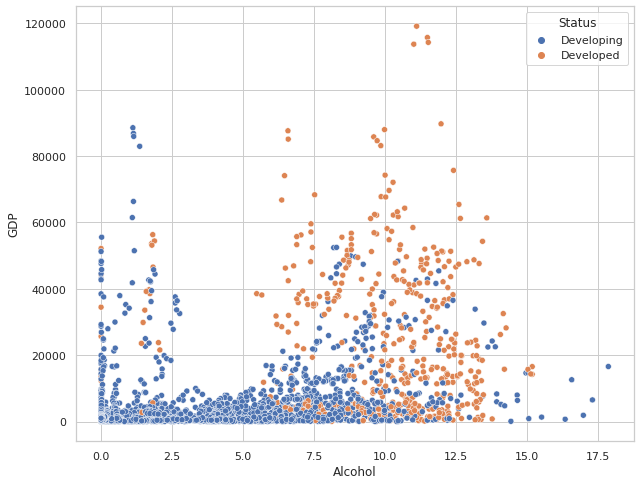

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='GDP',x = 'Alcohol', data = main_data, palette ='deep',hue ='Status')
plt.xlabel('Alcohol')

In [ ]:
print(main_data.columns.tolist())

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [ ]:
main_data[0:18]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [ ]:
url_happiness='https://raw.githubusercontent.com/yash331/ds203_project/main/happiness-cantril-ladder.csv'
happiness = pd.read_csv(url_happiness, encoding='unicode_escape')
happiness.head()

,Entity,Code,Year,Life satisfaction in Cantril Ladder (World Happiness Report 2022)
0,Afghanistan,AFG,2006,3.723590
1,Afghanistan,AFG,2007,4.401778
2,Afghanistan,AFG,2008,4.758381
3,Afghanistan,AFG,2009,3.831719
4,Afghanistan,AFG,2010,3.782938


In [ ]:
happiness.isnull().sum()

Entity                                                               0
Code                                                                 4
Year                                                                 0
Life satisfaction in Cantril Ladder (World Happiness Report 2022)    0
dtype: int64

In [ ]:
df3 = pd.merge(main_data, happiness, how='inner', left_on=['Country','Year'], right_on=['Entity','Year'])

In [ ]:
df3.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Entity,Code,Life satisfaction in Cantril Ladder (World Happiness Report 2022)
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Afghanistan,AFG,2.661718
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Afghanistan,AFG,4.220169
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Afghanistan,AFG,3.982855
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Afghanistan,AFG,3.130896
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Afghanistan,AFG,3.572100


Text(0.5, 0, 'Happiness index or life satisfaction')

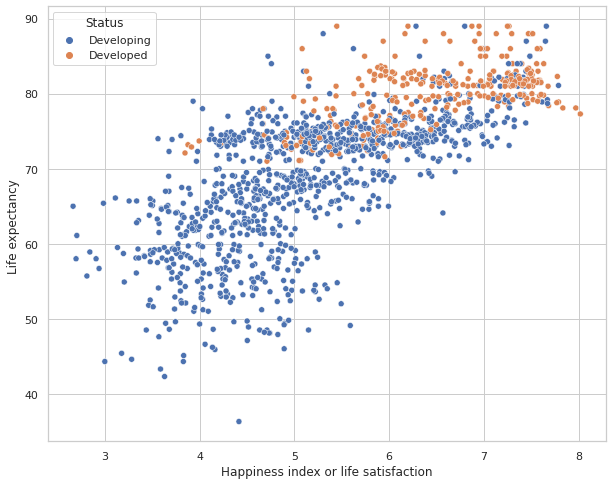

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Life expectancy ',x = 'Life satisfaction in Cantril Ladder (World Happiness Report 2022)', data = df3, palette ='deep',hue ='Status')
plt.xlabel('Happiness index or life satisfaction')

Text(0.5, 0, 'Happiness index or life satisfaction')

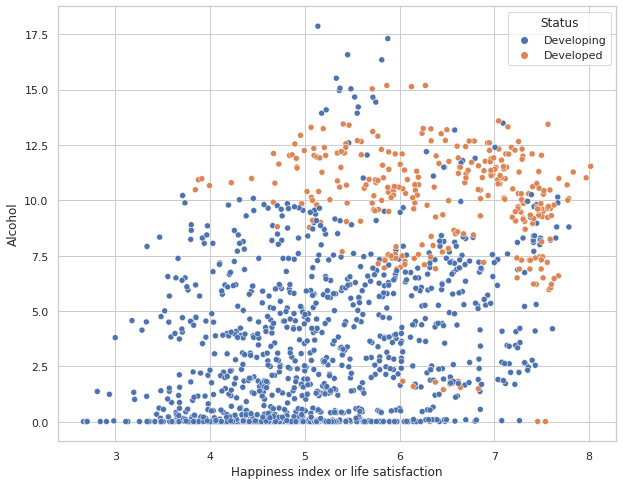

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Alcohol',x = 'Life satisfaction in Cantril Ladder (World Happiness Report 2022)', data = df3, palette ='deep',hue ='Status')
plt.xlabel('Happiness index or life satisfaction')

Text(0.5, 0, 'Income compostion of resources')

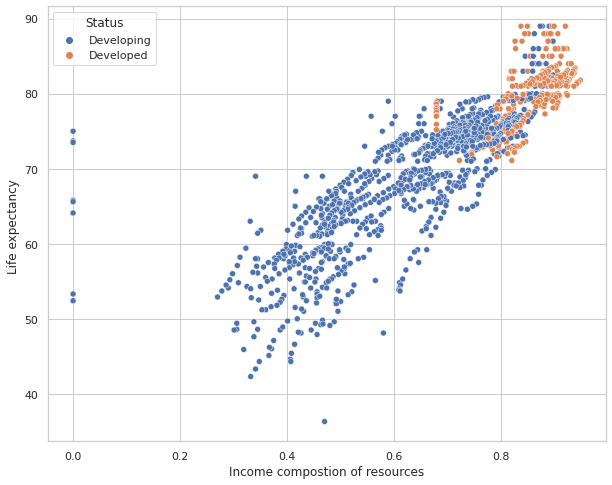

In [ ]:
#['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Life expectancy ',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

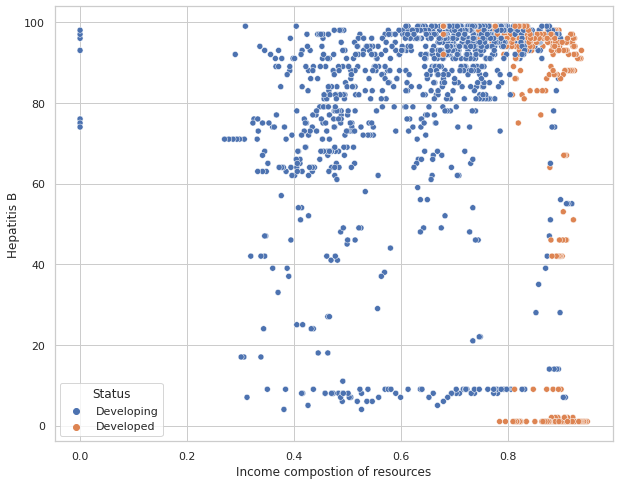

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Hepatitis B',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

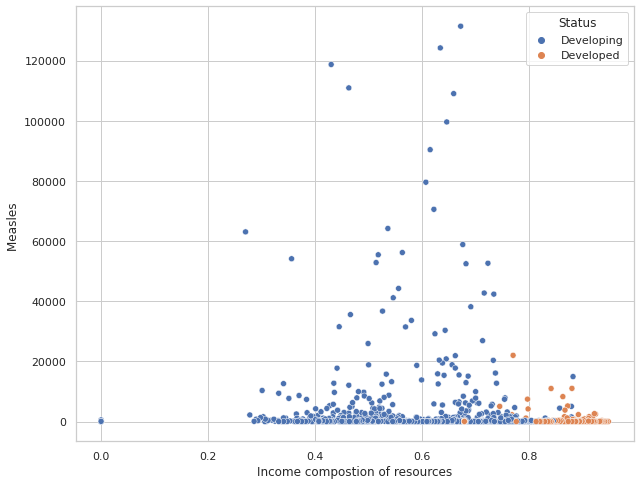

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Measles ',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

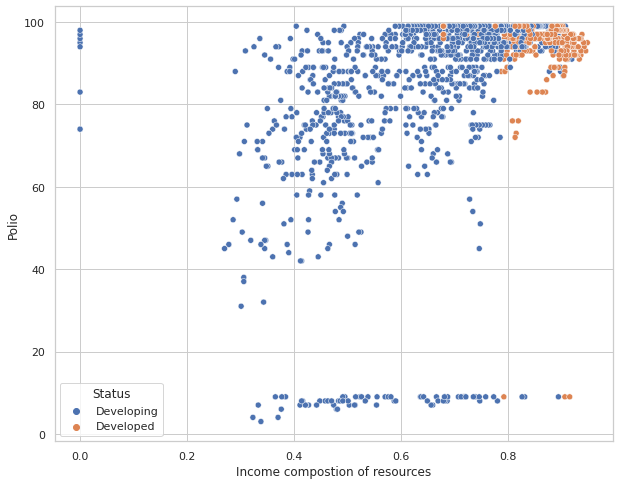

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Polio',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

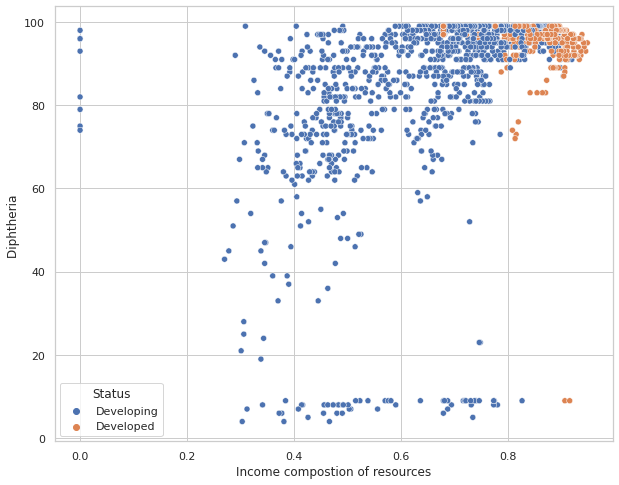

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Diphtheria ',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

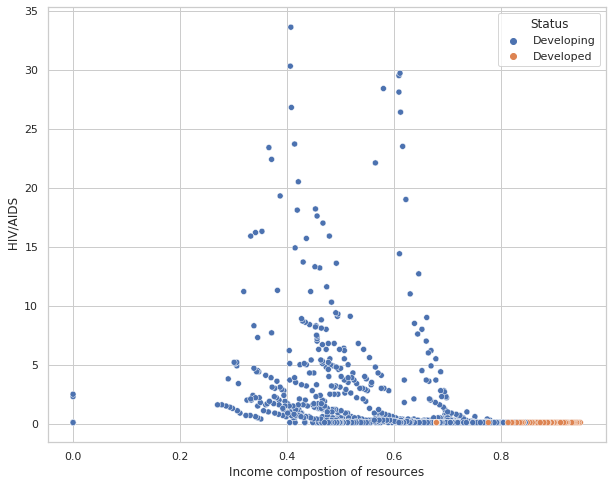

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y=' HIV/AIDS',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

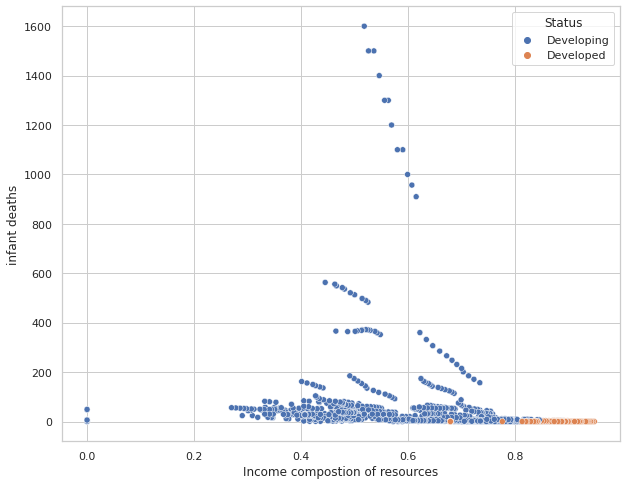

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='infant deaths',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

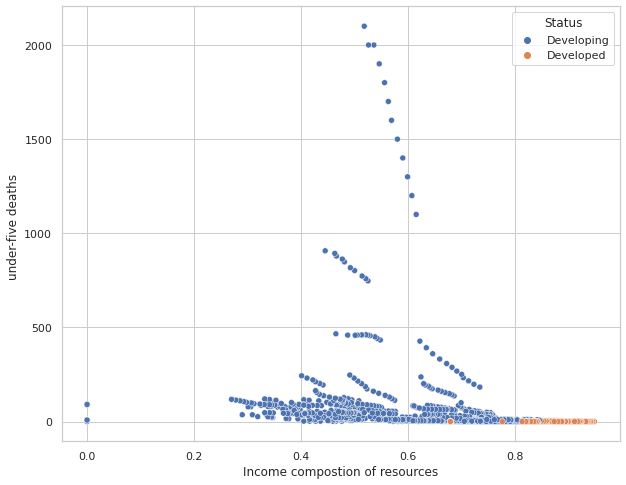

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='under-five deaths ',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

Text(0.5, 0, 'Income compostion of resources')

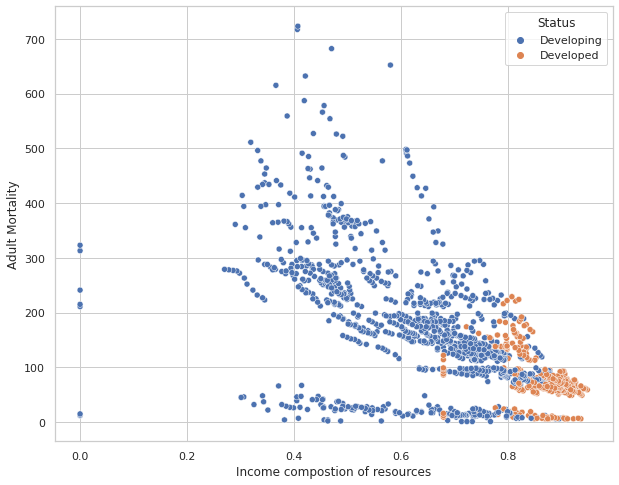

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(y='Adult Mortality',x = 'Income composition of resources', data = df3, palette ='deep',hue ='Status')
plt.xlabel("Income compostion of resources")

In [ ]:
#['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']